Missing values:
MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64
Duplicates: 0


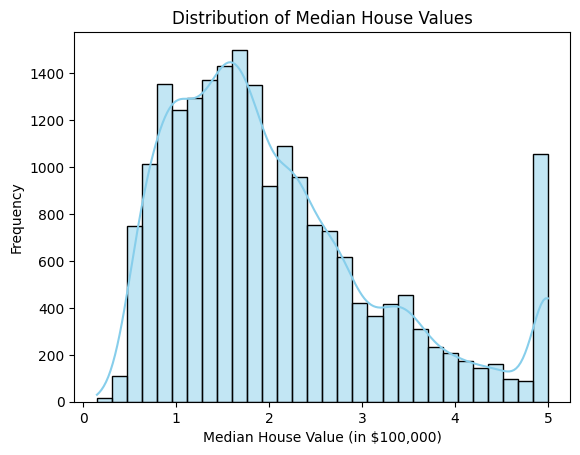

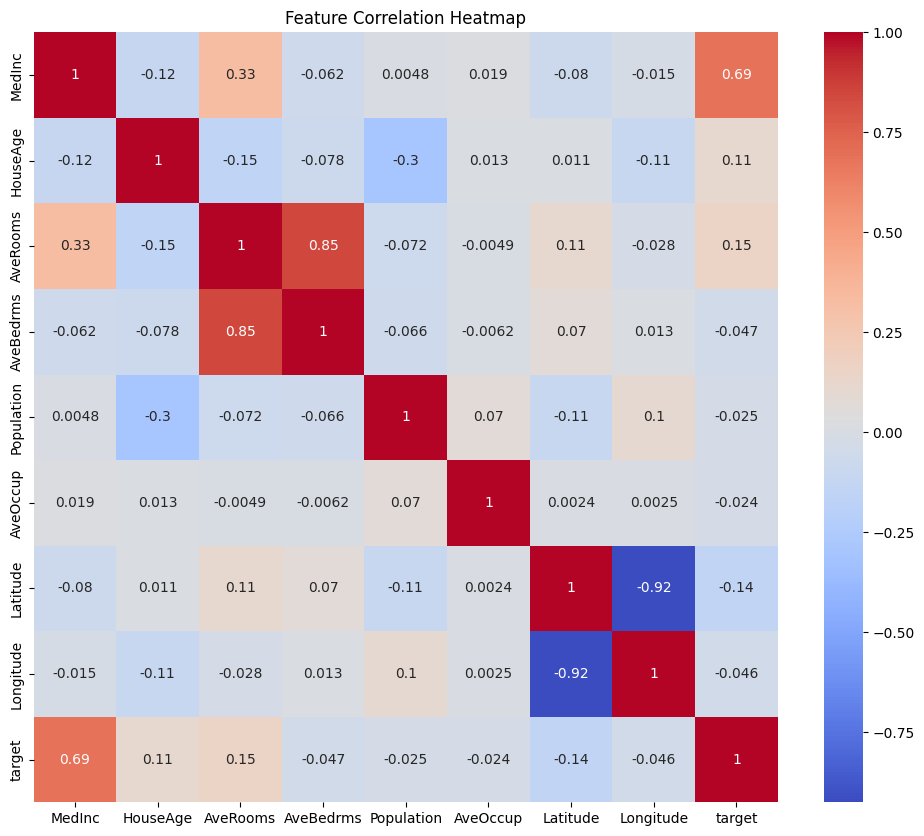

Decision Tree Regressor Evaluation:
Mean Squared Error (MSE): 0.49396854311945243
R-squared (R²): 0.6230424613065773

Random Forest Regressor Evaluation:
Mean Squared Error (MSE): 0.255169737347244
R-squared (R²): 0.8052747336256919

Best parameters for Decision Tree: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2}


In [ ]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import fetch_california_housing

# Step 2: Load California Housing Dataset
# Fetch California Housing dataset
california = fetch_california_housing()

# Convert the dataset into a DataFrame
df_california = pd.DataFrame(california.data, columns=california.feature_names)
df_california['target'] = california.target

# Step 3: Data Cleaning (check for missing values, duplicates)
print(f"Missing values:\n{df_california.isnull().sum()}")
print(f"Duplicates: {df_california.duplicated().sum()}")

# Step 4: Exploratory Data Analysis (EDA)
# Visualizing the distribution of the target variable (Median House Value)
sns.histplot(df_california['target'], kde=True, color='skyblue', bins=30)
plt.title('Distribution of Median House Values')
plt.xlabel('Median House Value (in $100,000)')
plt.ylabel('Frequency')
plt.show()

# Visualizing correlations between features
correlation = df_california.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

# Step 5: Data Preprocessing
# Split data into features and target
X = df_california.drop(columns='target')
y = df_california['target']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features (important for some algorithms)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 6: Model Building - Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Step 7: Model Building - Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Step 8: Model Evaluation

# Decision Tree Evaluation
dt_predictions = dt_model.predict(X_test)
print("Decision Tree Regressor Evaluation:")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, dt_predictions)}")
print(f"R-squared (R²): {r2_score(y_test, dt_predictions)}")

# Random Forest Evaluation
rf_predictions = rf_model.predict(X_test)
print("\nRandom Forest Regressor Evaluation:")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, rf_predictions)}")
print(f"R-squared (R²): {r2_score(y_test, rf_predictions)}")

# Step 9: Hyperparameter Tuning (Optional)
# Hyperparameter tuning for Decision Tree
dt_param_grid = {'max_depth': [5, 10, 15], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
dt_grid_search = GridSearchCV(DecisionTreeRegressor(random_state=42), dt_param_grid, cv=5)
dt_grid_search.fit(X_train, y_train)
print(f"\nBest parameters for Decision Tree: {dt_grid_search.best_params_}")

# Hyperparameter tuning for Random Forest
rf_param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [5, 10, 15], 'min_samples_split': [2, 5, 10]}
rf_grid_search = GridSearchCV(RandomForestRegressor(random_state=42), rf_param_grid, cv=5)
rf_grid_search.fit(X_train, y_train)
print(f"Best parameters for Random Forest: {rf_grid_search.best_params_}")

# Step 10: Model Comparison
print("\n--- Final Model Evaluation ---")
best_dt_model = dt_grid_search.best_estimator_
best_rf_model = rf_grid_search.best_estimator_

# Evaluate best models
best_dt_predictions = best_dt_model.predict(X_test)
best_rf_predictions = best_rf_model.predict(X_test)

# Compare MSE and R² for best models
print(f"Best Decision Tree Mean Squared Error: {mean_squared_error(y_test, best_dt_predictions)}")
print(f"Best Random Forest Mean Squared Error: {mean_squared_error(y_test, best_rf_predictions)}")
print(f"Best Decision Tree R²: {r2_score(y_test, best_dt_predictions)}")
print(f"Best Random Forest R²: {r2_score(y_test, best_rf_predictions)}")

# Plotting the Predictions vs True Values for both models

# Decision Tree Prediction vs True Value
plt.figure(figsize=(12, 6))
plt.scatter(y_test, best_dt_predictions, color='blue', label='Decision Tree Predictions', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Decision Tree: Predictions vs True Values')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.legend()
plt.show()

# Random Forest Prediction vs True Value
plt.figure(figsize=(12, 6))
plt.scatter(y_test, best_rf_predictions, color='green', label='Random Forest Predictions', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Random Forest: Predictions vs True Values')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.legend()
plt.show()
